In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count =  len(full_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = full_data.loc[full_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_id

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = full_data.loc[full_data["Mouse ID"] == "g989", :]
duplicate_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = full_data[full_data["Mouse ID"].isin(duplicate_id)==False]
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count = len(cleaned_df["Mouse ID"].unique())
new_count

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

sum_stats = pd.DataFrame({"mean tumor volume":mean,
                         "median tumor volume":median,
                         "tumor volume variance":var,
                         "tumor volume std. dev.":std,
                        "tumor volume std. err.":sem})
sum_stats

,mean tumor volume,median tumor volume,tumor volume variance,tumor volume std. dev.,tumor volume std. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum_aggregation = cleaned_df.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
sum_aggregation
# Using the aggregation method, produce the same summary statistics in a single line.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<AxesSubplot:title={'center':'Number of Mice Tested for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

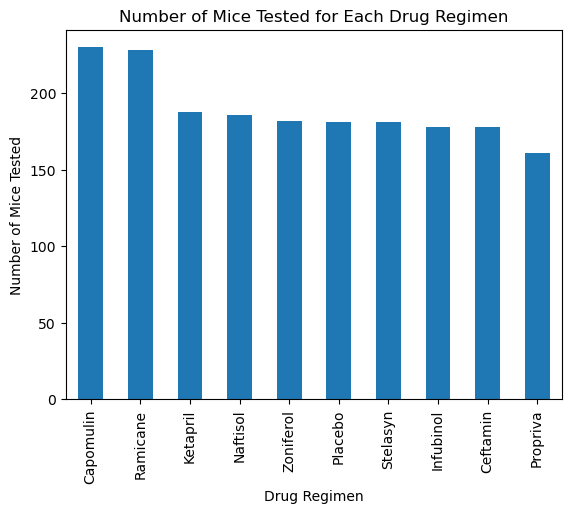

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = full_data['Drug Regimen'].value_counts()

# Plot using Pandas built-in plot function
counts.plot(kind='bar', rot=90, xlabel="Drug Regimen", ylabel="Number of Mice Tested", title="Number of Mice Tested for Each Drug Regimen")

Text(0, 0.5, 'Number of Mice Tested')

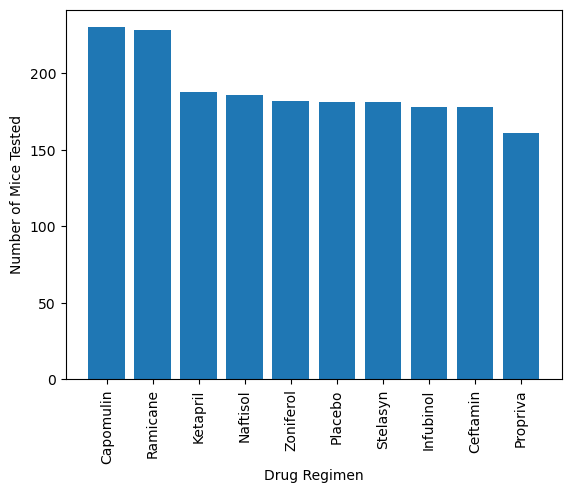

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = full_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

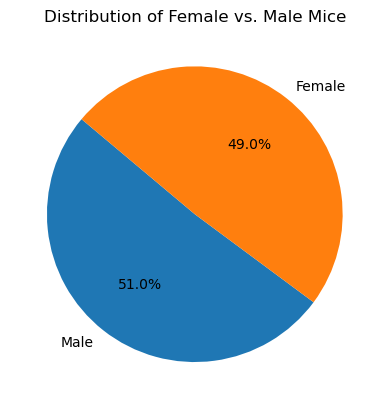

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of mice by gender
gender_distribution = cleaned_df['Sex'].value_counts()

# Plot using Pandas built-in plot function
gender_distribution.plot.pie(autopct='%1.1f%%', startangle=140, title="Distribution of Female vs. Male Mice")
plt.ylabel('')
plt.show()

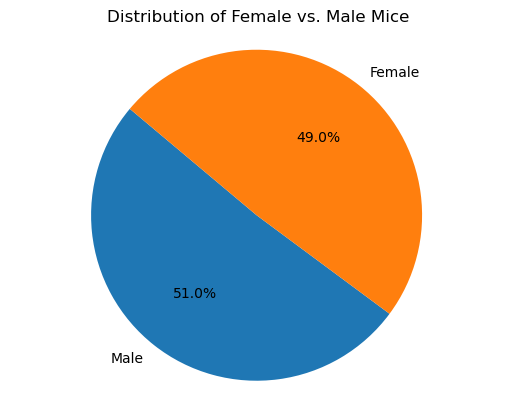

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Female vs. Male Mice")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = full_data.groupby('Mouse ID')['Timepoint'].max()
subset_df = full_data[full_data['Drug Regimen'].isin(specified_regimens)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(subset_df, last_timepoints, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,x822,Ceftamin,61.386660
96,y163,Infubinol,67.685569
97,y769,Ceftamin,68.594745
98,y865,Ceftamin,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create an empty dictionary to store tumor volume data for each regimen
tumor_vol_data = {}

# Loop through each specified regimen
for regimen in specified_regimens:
    # Locate the rows which contain mice on the current regimen and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Store the tumor volume data in the dictionary
    tumor_vol_data[regimen] = tumor_volumes
    
    # Calculate the IQR for the current regimen
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers for the current regimen
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")

Regimen: Capomulin
IQR: 7.781863460000004
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Ramicane
IQR: 9.098536719999998
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Infubinol
IQR: 11.477135160000003
Potential Outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ceftamin
IQR: 15.577752179999997
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


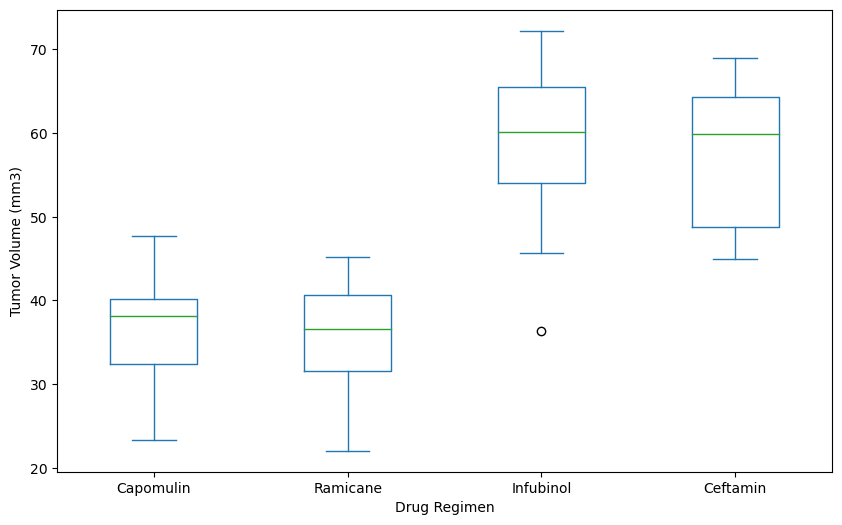

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
                  for regimen in specified_regimens]
data_df = pd.DataFrame(tumor_vol_data, index=specified_regimens).T

# Generate a box plot using pandas built-in plotting function
ax = data_df.plot(kind='box', figsize=(10, 6))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

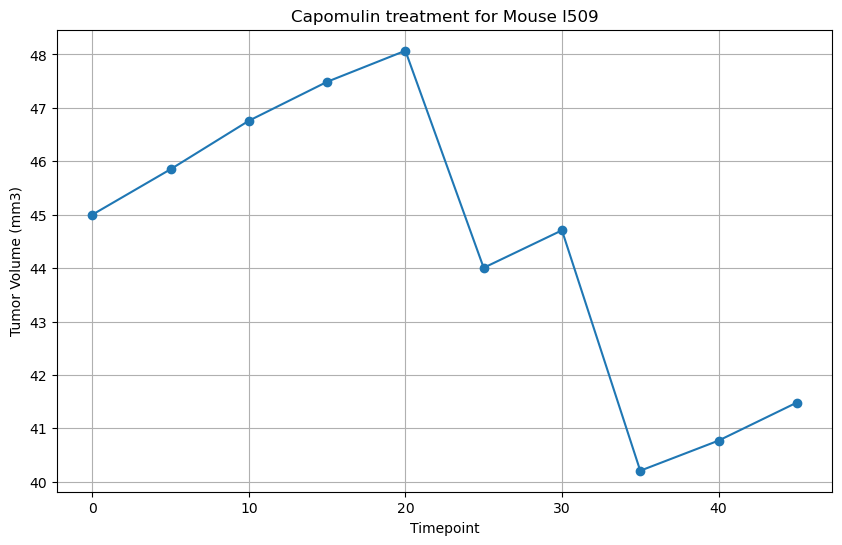

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
mouse_l509_data = capomulin_data[capomulin_data["Mouse ID"] == "l509"]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_l509_data["Timepoint"], mouse_l509_data["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment for Mouse l509")
plt.grid(True)
plt.show()

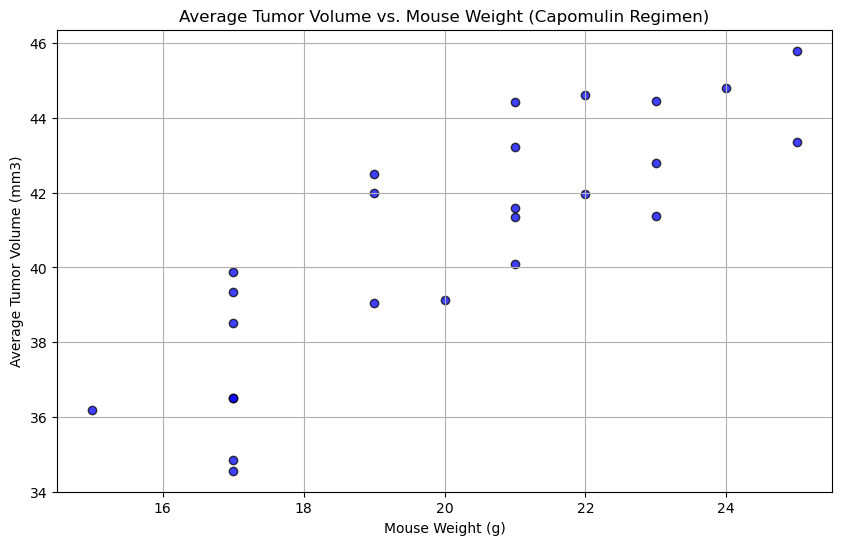

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.grid(True)
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
